# PROJECT 2:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score

## READING THE DATA:

In [ ]:
df = pd.read_csv("/content/telco-customer-churn.csv")

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info() #Information on all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.columns #column names

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
corr = df.corr()
corr  #correlation on all numeric data

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [ ]:
df.nunique(axis=0) #returns the number of unique values for each attribute

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## EDA:

In [ ]:
df.isnull().values.any() # to find all the null, NAN or empty values over the entire DataFrame
df.isnull().sum()
df.drop(columns='customerID', inplace=True)

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').astype('float64')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean()) #substitute null values with mean

df.isnull().values.any() # to find all the null, NAN or empty values over the entire DataFrame to re-check
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
corr = df.corr() # correlation on all the categorical as well as numeric data
corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102395
tenure,0.016567,1.000000,0.247900,0.824757
MonthlyCharges,0.220173,0.247900,1.000000,0.650468
TotalCharges,0.102395,0.824757,0.650468,1.000000


<Axes: >

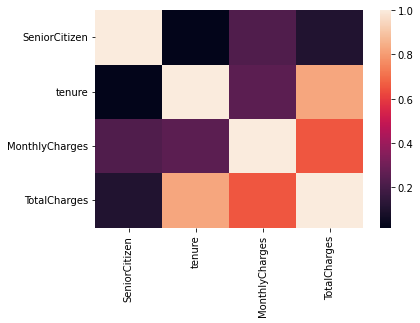

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

## VISUALIZATION REPORTS:

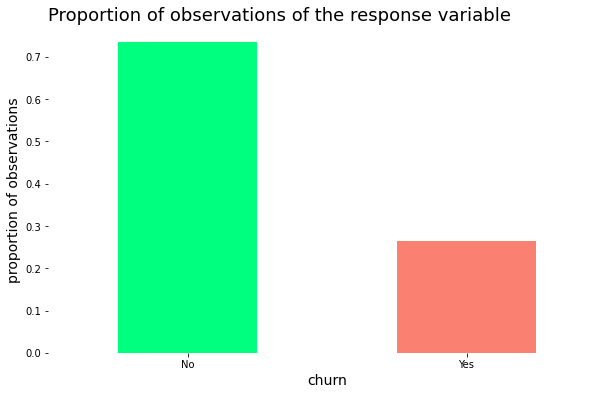

In [ ]:
# create a figure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# proportion of observation of each class
prop_response = df['Churn'].value_counts(normalize=True)

# create a bar plot showing the percentage of churn
prop_response.plot(kind='bar',
                   ax=ax,
                   color=['springgreen','salmon'])

# set title and labels
ax.set_title('Proportion of observations of the response variable',
             fontsize=18, loc='left')
ax.set_xlabel('churn',
              fontsize=14)
ax.set_ylabel('proportion of observations',
              fontsize=14)
ax.tick_params(rotation='auto')

# eliminate the frame from the plot
spine_names = ('top', 'right', 'bottom', 'left')
for spine_name in spine_names:
    ax.spines[spine_name].set_visible(False)

In [ ]:
import math
def percentage_stacked_plot(columns_to_plot, super_title):

    '''
    Prints a 100% stacked plot of the response variable for independent variable of the list columns_to_plot.
            Parameters:
                    columns_to_plot (list of string): Names of the variables to plot
                    super_title (string): Super title of the visualization
            Returns:
                    None
    '''

    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows))
    fig.suptitle(super_title, fontsize=22,  y=.95)


    # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        prop_by_independent = pd.crosstab(df[column], df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0, color=['springgreen','salmon'])

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Proportion of observations by ' + column,
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

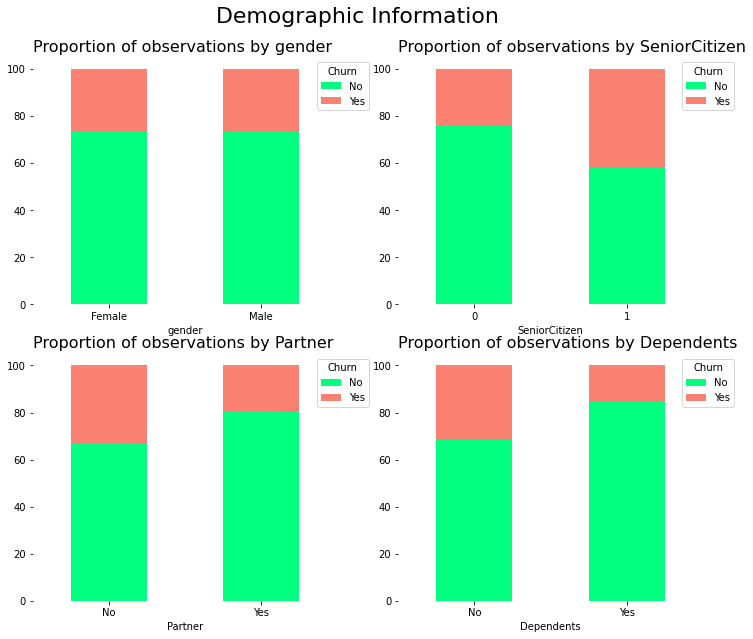

In [ ]:
demographic_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# stacked plot of demographic columns
percentage_stacked_plot(demographic_columns, 'Demographic Information')

In [ ]:
df['PaymentMethod'] = df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

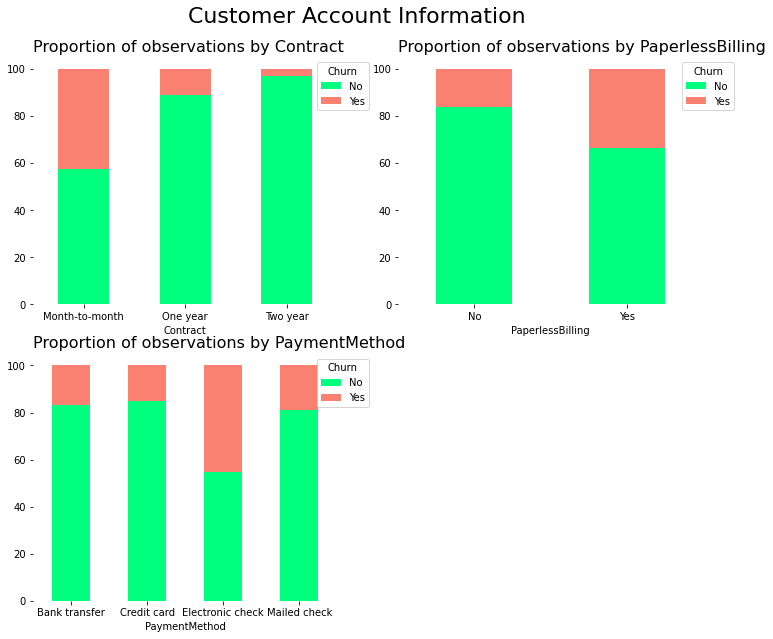

In [ ]:
account_columns = ['Contract', 'PaperlessBilling', 'PaymentMethod']

# stacked plot of customer account columns
percentage_stacked_plot(account_columns, 'Customer Account Information')

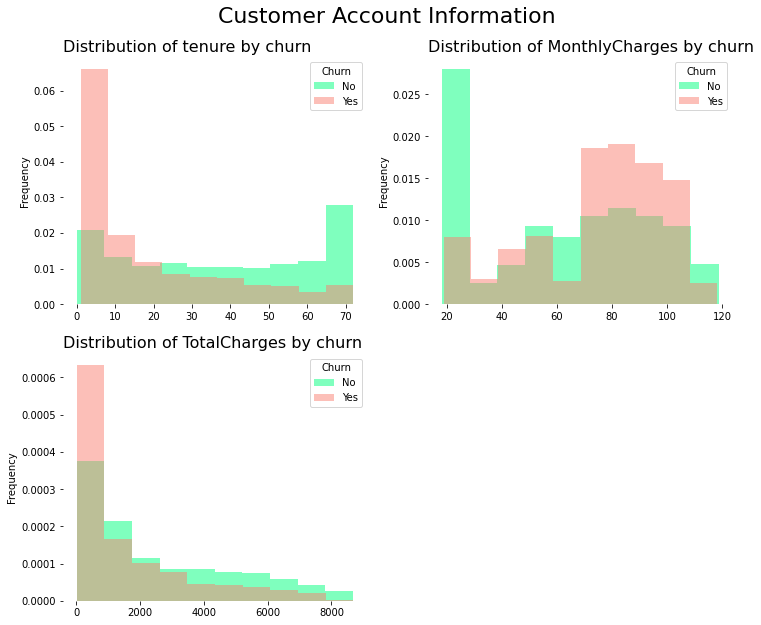

In [ ]:
def histogram_plots(columns_to_plot, super_title):
    # set number of rows and number of columns
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows))
    fig.suptitle(super_title, fontsize=22,  y=.95)


    # loop to each demographic column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # histograms for each class (normalized histogram)
        df[df['Churn']=='No'][column].plot(kind='hist', ax=ax, density=True,
                                                       alpha=0.5, color='springgreen', label='No')
        df[df['Churn']=='Yes'][column].plot(kind='hist', ax=ax, density=True,
                                                        alpha=0.5, color='salmon', label='Yes')

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.5, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Distribution of ' + column + ' by churn',
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

# customer account column names
account_columns_numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']
# histogram of costumer account columns
histogram_plots(account_columns_numeric, 'Customer Account Information')

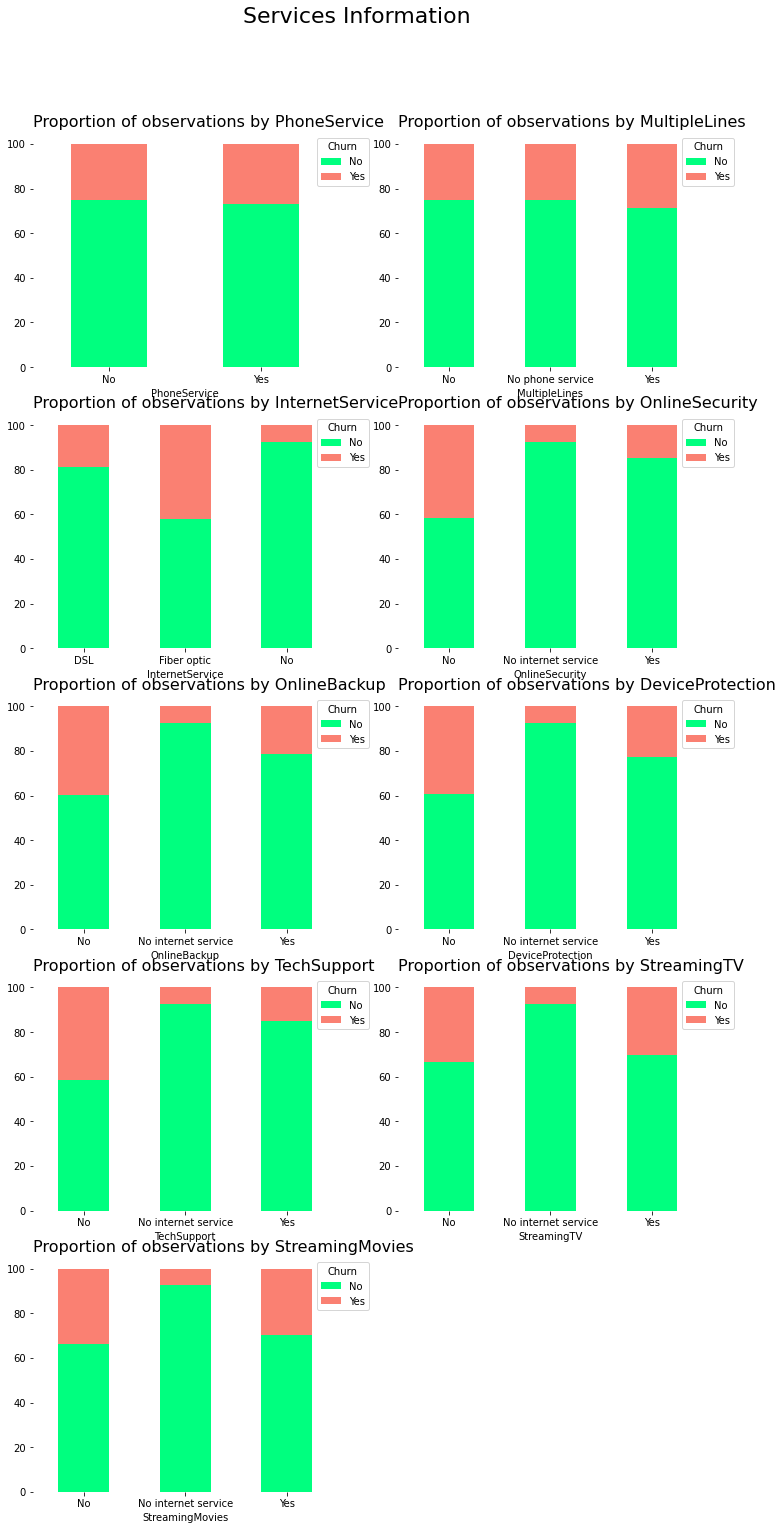

In [ ]:
# services column names
services_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# stacked plot of services columns
percentage_stacked_plot(services_columns, 'Services Information')

## FEATURE ENGINEERING:

In [ ]:
from sklearn.metrics import mutual_info_score

def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, df.Churn)

# select categorial variables excluding the response variable
categorical_variables = df.select_dtypes(include=object).drop('Churn', axis=1)

# compute the mutual information score between each categorical variable and the target
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

# visualize feature importance
print(feature_importance)

Contract            0.098453
OnlineSecurity      0.064677
TechSupport         0.063021
InternetService     0.055574
OnlineBackup        0.046792
PaymentMethod       0.044519
DeviceProtection    0.043917
StreamingMovies     0.032001
StreamingTV         0.031908
PaperlessBilling    0.019194
Dependents          0.014467
Partner             0.011454
MultipleLines       0.000801
PhoneService        0.000072
gender              0.000037
dtype: float64


In [ ]:
df = df.drop(['gender', 'PhoneService','MultipleLines'], axis=1)

## ENCODING THE CATEGORICAL DATA:

In [ ]:
df['Partner'] = pd.factorize(df.Partner)[0]
df['Dependents'] = pd.factorize(df.Dependents)[0]
df['InternetService'] = pd.factorize(df.InternetService)[0]
df['OnlineSecurity'] = pd.factorize(df.OnlineSecurity)[0]
df['OnlineBackup'] = pd.factorize(df.OnlineBackup)[0]
df['DeviceProtection'] = pd.factorize(df.DeviceProtection)[0]
df['TechSupport'] = pd.factorize(df.TechSupport)[0]
df['StreamingTV'] = pd.factorize(df.StreamingTV)[0]
df['StreamingMovies'] = pd.factorize(df.StreamingMovies)[0]
df['Contract'] = pd.factorize(df.Contract)[0]
df['PaperlessBilling'] = pd.factorize(df.PaperlessBilling)[0]
df['PaymentMethod'] = pd.factorize(df.PaymentMethod)[0]
df['Churn'] = pd.factorize(df.Churn)[0]

In [ ]:
features = df.iloc[:,2:-1]
Y = df.iloc[:,-1:] # splitting last column Churn
features  # splitting all but the last column as features

,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,0,0,0,0,0,0,0,0,0,29.85,29.85
1,0,34,0,1,1,1,0,0,0,1,1,1,56.95,1889.50
2,0,2,0,1,0,0,0,0,0,0,0,1,53.85,108.15
3,0,45,0,1,1,1,1,0,0,1,1,2,42.30,1840.75
4,0,2,1,0,1,0,0,0,0,0,0,0,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,24,0,1,1,1,1,1,1,1,0,1,84.80,1990.50
7039,1,72,1,0,0,1,0,1,1,1,0,3,103.20,7362.90
7040,1,11,0,1,1,0,0,0,0,0,0,0,29.60,346.45
7041,0,4,1,0,1,0,0,0,0,0,0,1,74.40,306.60


## SPLITTING THE DATA:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, Y, test_size=0.20)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5634, 14)
(5634,)
(1409, 14)
(1409,)


## NORMALIZATION: (standard-scaler)

should remove the warning messages



In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## MODELS:

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

def create_models(seed=4):
    '''
    Create a list of machine learning models.
            Parameters:
                    seed (integer): random seed of the models
            Returns:
                    models (list): list containing the models
    '''

    models = []
    models.append(('Naive Bayes', GaussianNB()))
    models.append(('logistic_regression', LogisticRegression(random_state=seed, max_iter=1000)))
    models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    models.append(('XGBClassifier', XGBClassifier(random_state=seed)))

    return models

# create a list with all the algorithms we are going to assess
models = create_models()

In [ ]:
results = []
names = []
accuracys = []
precisions = []
f1 = []
scoring = 'Recall'
for name, model in models:
    # fit the model with the training data
    model.fit(X_train, y_train).predict(X_test)
    # make predictions with the testing data
    predictions = model.predict(X_test)
    # calculate accuracy
    recall = recall_score(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    # append the model name and the accuracy to the lists
    results.append(recall)
    names.append(name)
    accuracys.append(accuracy)
    precisions.append(precision)
    # print classifier accuracy
    print("Classifier: {}, \033[1m Recall: {}\033[0m)".format(name, recall))

Classifier: Naive Bayes,  Recall: 0.8213333333333334)
Classifier: logistic_regression,  Recall: 0.512)
Classifier: random_forest,  Recall: 0.43733333333333335)
Classifier: XGBClassifier,  Recall: 0.472)


In [ ]:
result_dict = {'MODEL': names, 'RECALL': results, 'ACCURACY':accuracys,'PRECISIONS': precisions}
df2 = pd.DataFrame(result_dict)
df2

,MODEL,RECALL,ACCURACY,PRECISIONS
0,Naive Bayes,0.821333,0.729595,0.495177
1,logistic_regression,0.512000,0.813343,0.705882
2,random_forest,0.437333,0.782115,0.630769
3,XGBClassifier,0.472000,0.785664,0.629893


## SMOTE:

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_Smote, y_train_Smote = smote.fit_resample(X_train, y_train)

def smote_create_models(seed=2):
    '''
    Create a list of machine learning models.
            Parameters:
                    seed (integer): random seed of the models
            Returns:
                    models (list): list containing the models
    '''

    smote_models = []
    smote_models.append(('Naive Bayes', GaussianNB()))
    smote_models.append(('logistic_regression', LogisticRegression(random_state=seed, max_iter=1000)))
    smote_models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    smote_models.append(('XGBClassifier', XGBClassifier(random_state=seed)))

    return smote_models

# create a list with all the algorithms we are going to assess
smote_models = smote_create_models()

In [ ]:
scoring = 'Recall'
results_smote = []
names_smote = []
accuracys_smote = []
precisions_smote = []
f1_smote = []
for name, model in smote_models:
    # fit the model with the training data
    model.fit(X_train_Smote, y_train_Smote).predict(X_test)
    # make predictions with the testing data
    predictions = model.predict(X_test)
    # calculate accuracy
    recall = recall_score(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    # append the model name and the accuracy to the lists
    results_smote.append(recall)
    names_smote.append(name)
    accuracys_smote.append(accuracy)
    precisions_smote.append(precision)

In [ ]:
result_dict = {'MODEL': names_smote, 'RECALL': results_smote, 'ACCURACY':accuracys_smote,'PRECISIONS': precisions_smote}
df3 = pd.DataFrame(result_dict)
df3

,MODEL,RECALL,ACCURACY,PRECISIONS
0,Naive Bayes,0.842667,0.713272,0.478064
1,logistic_regression,0.794667,0.765082,0.539855
2,random_forest,0.552000,0.777857,0.588068
3,XGBClassifier,0.594667,0.783534,0.593085


## CROSS-VALIDATION & HYPERPARAMETER TUNING:

In [ ]:
auc_name = []
score = []
for name, model in smote_models:
    scores = cross_val_score(model, X_train_Smote, y_train_Smote, cv=5, scoring='roc_auc')
    auc_name.append(name)
    score.append(scores.mean())

In [ ]:
AUC = {"Model": auc_name, "Scores": score}
AUC_df = pd.DataFrame(AUC)
AUC_df

,Model,Scores
0,Naive Bayes,0.823035
1,logistic_regression,0.849158
2,random_forest,0.917025
3,XGBClassifier,0.922514


##HYPERPARAMETER TUNING

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [ ]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
randomforest = RandomForestClassifier()
randomforest=randomforest.fit(X_train, y_train)

In [ ]:
rf_random = RandomizedSearchCV(estimator = randomforest, param_distributions = random_grid, n_iter = 100, cv = 3, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
rf_random_predicted = rf_random.predict(X_test)
rf_random_predicted

In [ ]:
acc_rff=accuracy_score(y_test,rf_random_predicted)
recall_rff=recall_score(y_test,rf_random_predicted)
precision_rff=precision_score(y_test,rf_random_predicted)
f1score_rff=f1_score(y_test,rf_random_predicted)

print(accuracy_score(y_test,rf_random_predicted))

In [ ]:
print("Accuracy=",accuracy_score(y_test,rf_random_predicted))
print("Precission",precision_score(y_test,rf_random_predicted))
print("F1 score=",f1_score(y_test,rf_random_predicted))
print('\033[1m'
"Recall=",recall_score(y_test,rf_random_predicted))

In [ ]:
rf_random = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid, n_iter = 100, cv = 3, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train.values.ravel())

In [ ]:
rf_random_predicted = rf_random.predict(X_test)
rf_random_predicted

In [ ]:
acc_xgg=accuracy_score(y_test,rf_random_predicted )
recall_xgg=recall_score(y_test,rf_random_predicted )
precision_xgg=precision_score(y_test,rf_random_predicted )
f1score_xgg=f1_score(y_test,rf_random_predicted )

print(accuracy_score(y_test,rf_random_predicted))

In [ ]:
print("Accuracy=",acc_xgg)
print("Precission",precision_xgg)
print("F1 score=",f1score_xgg)
print('\033[1m'
"Recall=",recall_xgg)